In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score


In [2]:
x = [[0],[1],[2],[3]]
y = [0,0,1,1]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x,y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]])) # 0에 속할확률, 1에 속할 확률.

[0]
[[0.66666667 0.33333333]]


In [3]:
classifier = KNeighborsClassifier(n_neighbors=3,weights="distance",metric="euclidean")
training_points=[
    [0.5,0.2,0.1],
    [0.9,0.7,0.3],
    [0.4,0.5,0.7]
]

training_labels=[0,1,1]
classifier.fit(training_points,training_labels)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [4]:
unknown_points = [
    [0.2,0.1,0.7],
    [0.4,0.7,0.6],
    [0.5,0.8,0.1]
]

guesses = classifier.predict(unknown_points)
print("Accuracy: ", metrics.accuracy_score(training_labels,guesses))



Accuracy:  0.6666666666666666


In [5]:
iris = datasets.load_iris()
print(iris.feature_names)
x=iris.data[:,:4]
print(pd.DataFrame(x))
y=iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [6]:
# minmaxscale을 이용한 정규화 
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x=pd.DataFrame(x_scaled,columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))

0.9333333333333333


In [8]:
#cross validation
scores = cross_val_score(clf,x_scaled,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.9        1.        ]
0.9533333333333334


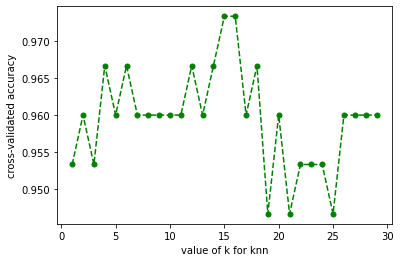

In [9]:
# k를 찾기 위한 방법
k_range = range(1,30)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn,x,y,cv=5,scoring="accuracy")
    k_scores.append(scores.mean())
#visualize
plt.plot(k_range,k_scores,marker='o',color='green',linestyle='dashed',markersize=5)
plt.xlabel('value of k for knn')
plt.ylabel('cross-validated accuracy')
plt.show()
# 급하강 하는 부분에대해서 k를 선정한다.

(404, 13) (102, 13)
RMSE value for k =  1 is:  6.533458382156615
RMSE value for k =  2 is:  5.709593749498621
RMSE value for k =  3 is:  4.6539825286421435
RMSE value for k =  4 is:  4.906214796301827
RMSE value for k =  5 is:  5.0852851926117255
RMSE value for k =  6 is:  5.3050110934403385
RMSE value for k =  7 is:  5.437776362145272
RMSE value for k =  8 is:  5.7766325625103505
RMSE value for k =  9 is:  5.9162730135904535
RMSE value for k =  10 is:  6.032231158128644
RMSE value for k =  11 is:  6.015260127343712
RMSE value for k =  12 is:  6.032981417805106
RMSE value for k =  13 is:  5.934959335454073
RMSE value for k =  14 is:  5.943177815362587
RMSE value for k =  15 is:  6.055387525401548
RMSE value for k =  16 is:  6.0659727962688335
RMSE value for k =  17 is:  6.1682431059235165
RMSE value for k =  18 is:  6.185559955314015
RMSE value for k =  19 is:  6.184915007192077


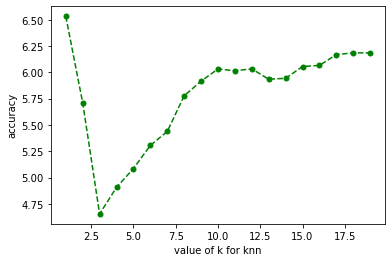

In [10]:
# knn 회귀 
boston = load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size = 0.2,random_state=42)
print(x_train.shape,x_test.shape)

rmse_val = []
for k in range(1,20):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print("RMSE value for k = ", k, 'is: ', error)
plt.plot(range(1,20),rmse_val,marker='o',color='green',linestyle='dashed',markersize = 5)
plt.xlabel('value of k for knn')
plt.ylabel('accuracy')
plt.show()
# rmes가 가장 작은 값을 골라야 한다.

In [13]:
# 유방암데이터 knn 실습.
breast_cancer_data = load_breast_cancer()
x_data = pd.DataFrame(breast_cancer_data.data)
y = pd.DataFrame(breast_cancer_data.target)

In [18]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [28]:
# knn에선 scaler를 해줘야함.
scaler = StandardScaler()
scaler.fit(x_data)
x_scaled = scaler.transform(x_data)
x=pd.DataFrame(x_scaled)
x.columns = breast_cancer_data.feature_names
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [30]:
# train&test 나누기
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 42)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

398
171
398
171


In [32]:
classifier = KNeighborsClassifier(n_neighbors = 3 )
classifier.fit(x_train,y_train)

C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(n_neighbors=3)

In [36]:
# x,y사이의 설명력이 98% 
print(classifier.score(x_train,y_train))

0.9849246231155779


C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Playdata\an

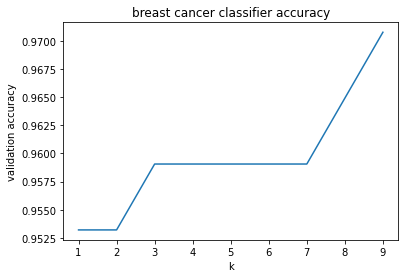

In [42]:
k_list = range(1,10)
accuracies=[]
for k in k_list :
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    accuracies.append(classifier.score(x_test,y_test))
plt.plot(k_list,accuracies)
plt.xlabel("k")
plt.ylabel("validation accuracy")
plt.title("breast cancer classifier accuracy")
plt.show()

In [47]:
# croos validation

scores = cross_val_score(classifier,x,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96491228 0.94736842 0.99122807 0.95614035 0.98230088]
0.968390001552554


C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\

C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\

C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\

C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\

C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\model_selection\

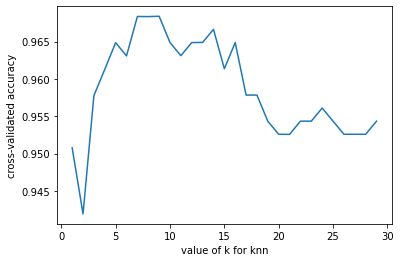

In [50]:
# 낙차폭이 큰 16이 제일 이상적인 값.
k_range = range(1,30)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = model_selection.cross_val_score(knn,x,y,cv=5,scoring="accuracy")
    k_scores.append(scores.mean())
plt.plot(k_range,k_scores)
plt.xlabel("value of k for knn")
plt.ylabel("cross-validated accuracy")
plt.show()

In [56]:
help("matplotlib.pyplot")

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, *, data=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Parameters
        ----------
        x : array-like
        
        detrend : callable, optional, default: `mlab.detrend_none`
            *x* is detrended by the *detrend* callable. This must be a
            function ``x = detrend(x)`` accepting and returning an
            `numpy.array`. Default is no normalization.
        
        normed : bool